In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


In [67]:
moons = make_moons(n_samples=200,noise=0.2,random_state=0)
X = moons[0]
y = moons[1]

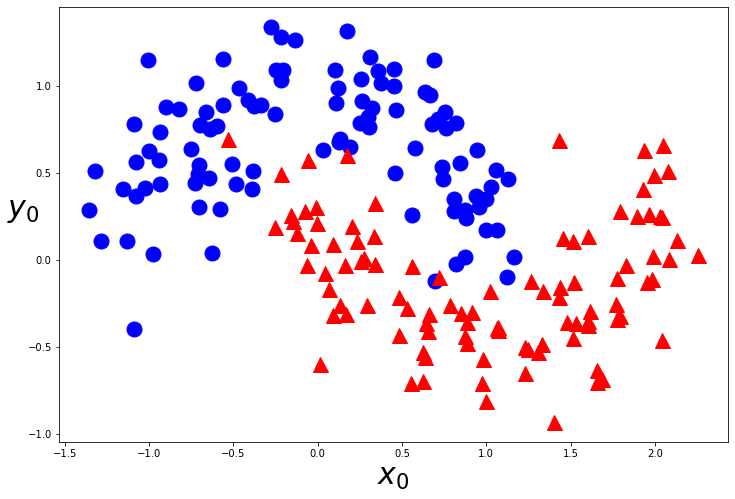

In [68]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model,X,y,margin=0.3):
    _x1 = np.linspace(X[:,0].min()-margin, X[:,0].max()+margin,100)
    _x2 = np.linspace(X[:,1].min()-margin, X[:,1].max()+margin,100)
    x1,x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['mediumblue','orangered'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)

def plot_datasets(X,y):
    plt.plot(X[:,0][y==0],X[:,1][y==0], "bo", ms=15)
    plt.plot(X[:,0][y==1],X[:,1][y==1], "r^", ms=15)
    plt.xlabel("$x_0$",fontsize=30)
    plt.ylabel("$y_0$",fontsize=30,rotation=0)

plt.figure(figsize=(12,8))
plot_datasets(X,y)
plt.show()


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

tree_clf = DecisionTreeClassifier().fit(X_train,y_train)

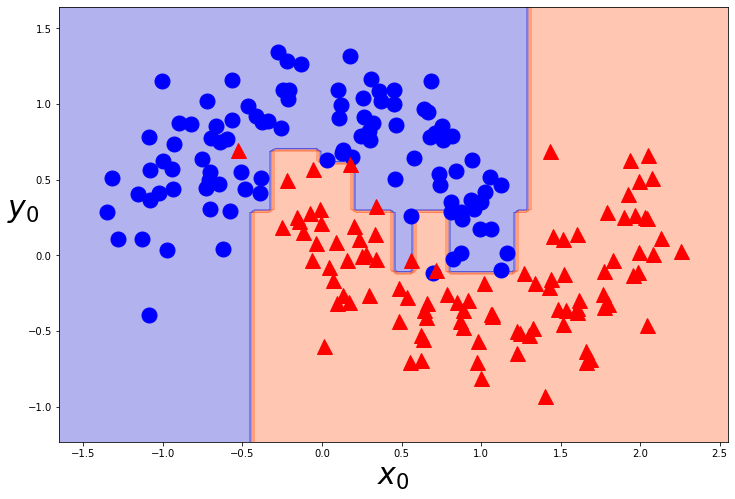

In [71]:
plt.figure(figsize=(12,8))
plot_decision_boundary(tree_clf, X, y)
plot_datasets(X,y)
plt.show()

In [72]:
from sklearn.ensemble import RandomForestClassifier

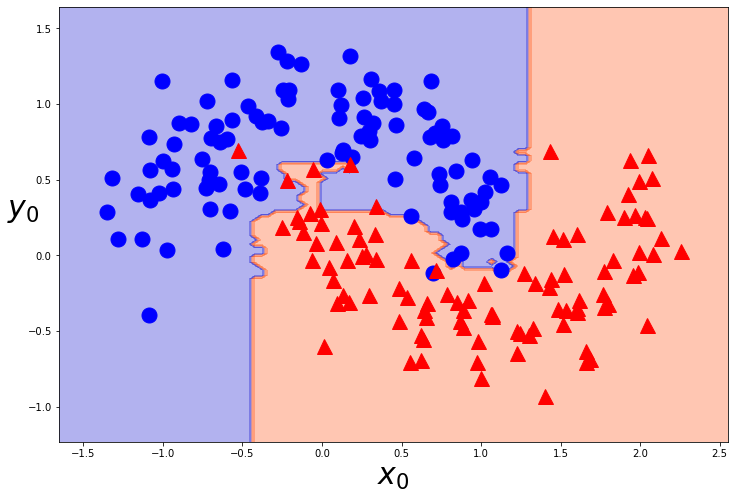

In [73]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train,y_train)

plt.figure(figsize=(12,8))
plot_decision_boundary(random_forest, X, y)
plot_datasets(X,y)
plt.show()

In [74]:
from sklearn.datasets import load_iris

In [75]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [76]:
random__forest_iris = RandomForestClassifier(random_state=0).fit(X_iris,y_iris)
random__forest_iris.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

Text(0.5, 0, 'Featureimportance')

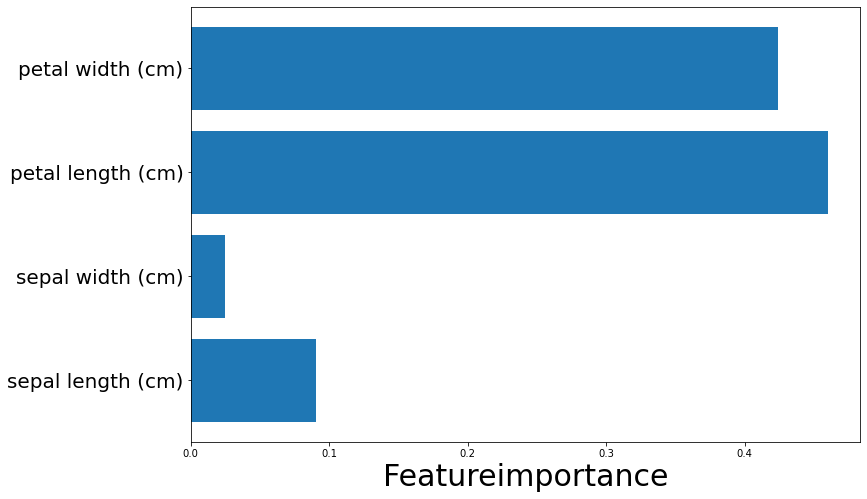

In [77]:
plt.figure(figsize=(12,8))
plt.barh(range(iris.data.shape[1]),random__forest_iris.feature_importances_)
plt.yticks(range(iris.data.shape[1]),iris.feature_names,fontsize=20)
plt.xlabel('Featureimportance',fontsize=30)

In [78]:
import pandas as pd

In [79]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [81]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['Sex','Embarked']

for col in cat_features:
    lbl = LabelEncoder()
    df[col] = lbl.fit_transform(list(df[col].values))

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [83]:
X = df.drop(columns=['PassengerId','Survived','Name','Ticket','Cabin'])
y = df['Survived']


In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [85]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
105,3,1,28.000000,0,0,7.8958,2
68,3,0,17.000000,4,2,7.9250,2
253,3,1,30.000000,1,0,16.1000,2
320,3,1,22.000000,0,0,7.2500,2
706,2,0,45.000000,0,0,13.5000,2
...,...,...,...,...,...,...,...
835,1,0,39.000000,1,1,83.1583,0
192,3,0,19.000000,1,0,7.8542,2
629,3,1,29.699118,0,0,7.7333,1
559,3,0,36.000000,1,0,17.4000,2


In [86]:
tree = DecisionTreeClassifier().fit(X_train,y_train)
tree.score(X_test,y_test)

0.7533632286995515

In [87]:
rnd_forest = RandomForestClassifier(n_estimators=500,max_depth=5,random_state=0).fit(X_train,y_train)

In [88]:
rnd_forest.score(X_test,y_test)

0.8295964125560538

In [89]:
test_df = pd.read_csv('test.csv')

In [96]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [97]:


for col in cat_features:
    lbl = LabelEncoder()
    test_df[col] = lbl.fit_transform(list(test_df[col].values))

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [98]:
X_pred = test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
ID = test_df['PassengerId']
X_pred.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [99]:
prediction = rnd_forest.predict(X_pred)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
submission = pd.DataFrame({
    'PassengerId': ID,
    'Survived': prediction 
})

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [101]:
submission.to_csv('submission.csv',index=False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
all_df = pd.concat((train_df.loc[:,'Pclass':'Embarked'],test_df.loc[:,'Pclass':'Embarked']))
all_df.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [11]:
all_df['Age'] = all_df['Age'].fillna(all_df['Age'].mean())
all_df['Fare'] = all_df['Fare'].fillna(all_df['Fare'].mean())
all_df['Embarked'] = all_df['Embarked'].fillna(all_df['Embarked'].mode()[0])


In [13]:
cat_features = ['Sex','Embarked']

for col in cat_features:
    lbl = LabelEncoder()
    all_df[col] = lbl.fit_transform(list(all_df[col].values))

all_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2
4,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",1,29.881138,0,0,A.5. 3236,8.0500,NaN,2
414,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,0
415,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,3,"Ware, Mr. Frederick",1,29.881138,0,0,359309,8.0500,NaN,2


In [14]:
all_df = all_df.drop(columns=['Name','Ticket','Cabin'])
all_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
413,3,1,29.881138,0,0,8.0500,2
414,1,0,39.000000,0,0,108.9000,0
415,3,1,38.500000,0,0,7.2500,2
416,3,1,29.881138,0,0,8.0500,2


In [24]:
train = all_df[:train_df.shape[0]]
test = all_df[train_df.shape[0]:]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.7 KB


In [25]:
y = train_df['Survived']
ID = test_df['PassengerId']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(train,y,random_state=0)

In [27]:
import xgboost as xgb

In [30]:
params = {
    "objective" : "binary:logistic",
    "eval_metric" : "auc",
    "eta" : 0.1,
    "max_depth" : 6,
    "subsample" : 1,
    "colsample_bytree" : 1,
    "silent" : 1
}

dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=100,
                  early_stopping_rounds=10,
                  evals=[(dtest,'test')])

[16:14:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	test-auc:0.88691
[1]	test-auc:0.89624
[2]	test-auc:0.89324
[3]	test-auc:0.88960
[4]	test-auc:0.89286
[5]	test-auc:0.88601
[6]	test-auc:0.89067
[7]	test-auc:0.89474
[8]	test-auc:0.88960
[9]	test-auc:0.88883
[10]	test-auc:0.88943


In [33]:
prediction = model.predict(xgb.DMatrix(test),ntree_limit=model.best_ntree_limit)
prediction#確率が出力される

/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


array([0.42588335, 0.4750208 , 0.42588335, 0.42588335, 0.5168644 ,
       0.42588335, 0.45609358, 0.46160665, 0.56230706, 0.42588335,
       0.42588335, 0.44456193, 0.5809824 , 0.42588335, 0.5809824 ,
       0.5809824 , 0.42588335, 0.43935266, 0.5168644 , 0.45609358,
       0.44066563, 0.56824934, 0.5809824 , 0.47461712, 0.5809824 ,
       0.42588335, 0.5809824 , 0.43935266, 0.44603732, 0.52094805,
       0.42588335, 0.46160665, 0.5       , 0.44124418, 0.4927498 ,
       0.43935266, 0.5168644 , 0.5168644 , 0.42588335, 0.4737735 ,
       0.43935266, 0.5063673 , 0.42588335, 0.5809824 , 0.5809824 ,
       0.42588335, 0.44603732, 0.42588335, 0.5809824 , 0.48098934,
       0.47461712, 0.43935266, 0.5809824 , 0.5809824 , 0.52094805,
       0.43798986, 0.42588335, 0.42588335, 0.42588335, 0.5809824 ,
       0.42588335, 0.42588335, 0.42588335, 0.56230706, 0.56824934,
       0.5809824 , 0.56230706, 0.44603732, 0.44603732, 0.5809824 ,
       0.56230706, 0.42588335, 0.5168644 , 0.44603732, 0.58098

In [34]:
prediction = np.where(prediction < 0.5,0,1)
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [36]:
submission = pd.DataFrame({
    "PassengerId":ID,
    "Survived":prediction
    
})

submission.to_csv('submission2.csv',index=False)